# **# SVM for classification**


**Load IRIS dataset, check its contents:**

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


**Split data into training and testing parts:**

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


**Use a Support Vector Machine for classification:**

In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

**Choose only first two features (columns) of iris.data SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data**

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load iris dataset
iris = load_iris()

# Selecting only the first two features (columns) of iris data
X = iris.data[:, :2]

# Filtering out some instances where the target is 2
X_filtered = X[iris.target != 2]
y_filtered = iris.target[iris.target != 2]

# Splitting the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2)

# Creating and training SVM model with linear kernel
SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train, y_train)

# Get some parameters of the trained model
print("Model Parameters:", SVMmodel.get_params())

# Evaluation of the model
accuracy = SVMmodel.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Model Accuracy: 1.0


**Plot scatterplots of targets 0 and 1 and check the separability of the classes:**

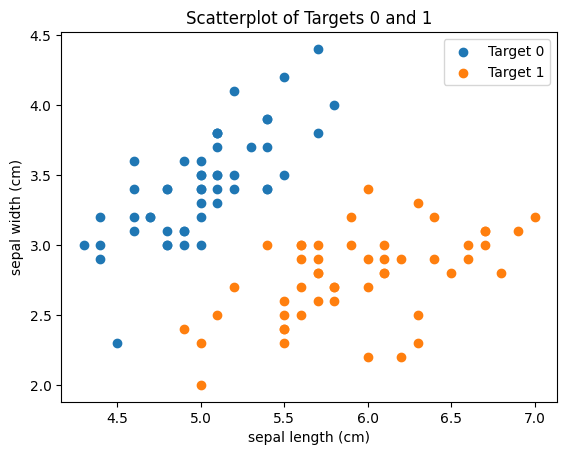

In [5]:
import matplotlib.pyplot as plt

# Filtering out some instances where the target is 0 or 1
X_filtered = X[(iris.target == 0) | (iris.target == 1)]
y_filtered = iris.target[(iris.target == 0) | (iris.target == 1)]

# Scattering plot for target 0
plt.scatter(X_filtered[y_filtered == 0][:, 0], X_filtered[y_filtered == 0][:, 1], label="Target 0")

# Scattering plot for target 1
plt.scatter(X_filtered[y_filtered == 1][:, 0], X_filtered[y_filtered == 1][:, 1], label="Target 1")

# Labels and legends
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatterplot of Targets 0 and 1")
plt.legend()

# Showing the plot
plt.show()


**Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)**

C = 0.1 - Model Accuracy: 1.0


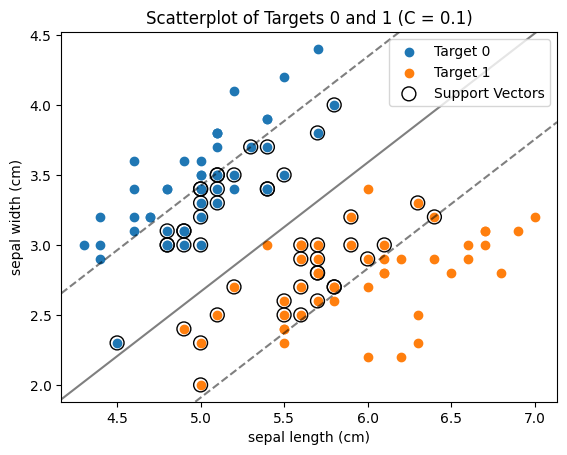

C = 1 - Model Accuracy: 1.0


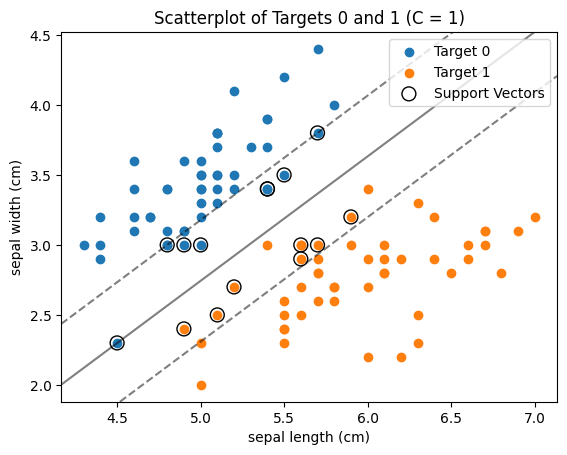

C = 10 - Model Accuracy: 1.0


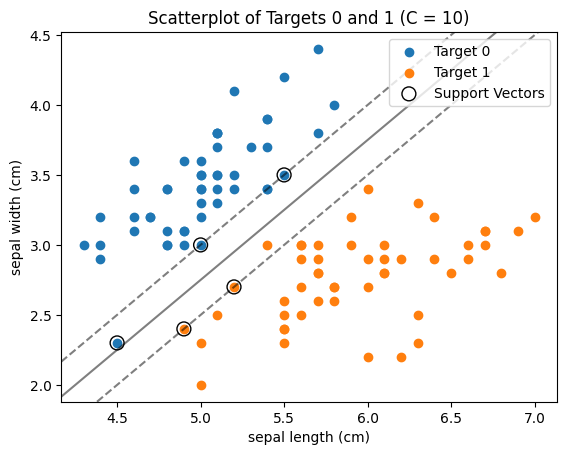

C = 100 - Model Accuracy: 1.0


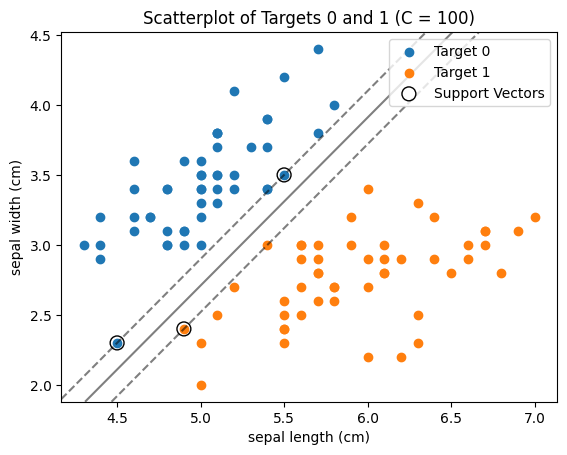

C = 200 - Model Accuracy: 1.0


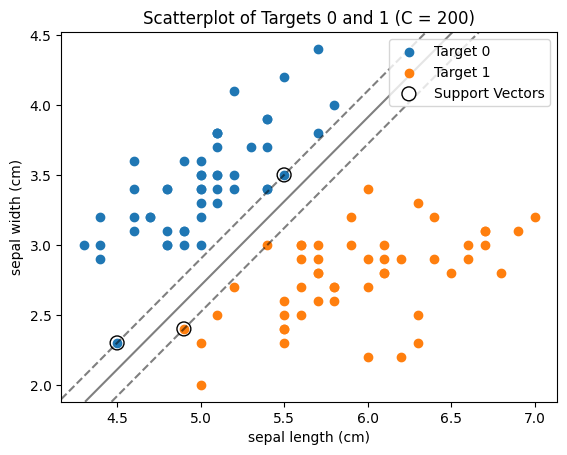

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


# Trying  different values of C
C_values = [0.1, 1, 10, 100, 200]
for C in C_values:
    # Create and train SVM model with linear kernel and specified C
    SVMmodel = SVC(kernel='linear', C=C)
    SVMmodel.fit(X_train, y_train)

    # Evaluation of  the model
    accuracy = SVMmodel.score(X_test, y_test)
    print("C =", C, "- Model Accuracy:", accuracy)


    plt.scatter(X_filtered[y_filtered == 0][:, 0], X_filtered[y_filtered == 0][:, 1], label="Target 0")
    plt.scatter(X_filtered[y_filtered == 1][:, 0], X_filtered[y_filtered == 1][:, 1], label="Target 1")

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Creation of grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = SVMmodel.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(SVMmodel.support_vectors_[:, 0], SVMmodel.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k', label="Support Vectors")

    # Labels and legend
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Scatterplot of Targets 0 and 1 (C = {})".format(C))
    plt.legend()
    plt.show()

**Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:**

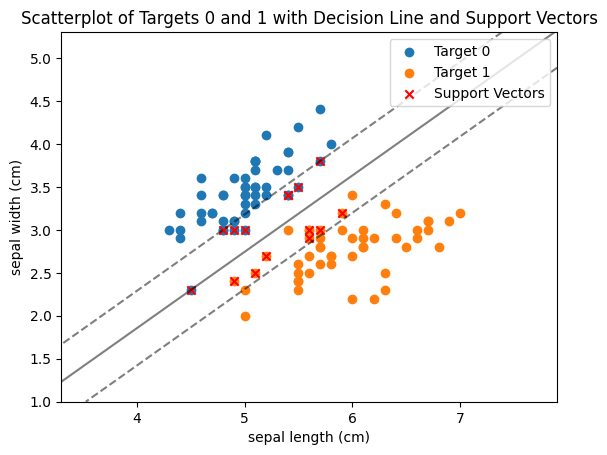

In [7]:
import numpy as np
import matplotlib.pyplot as plt



# Create and train SVM model with linear kernel and default C
SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train, y_train)

# Get support vectors
support_vectors = SVMmodel.support_vectors_

# Get coefficients and intercept
w = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

# Scatter plot for target 0
plt.scatter(X_filtered[y_filtered == 0][:, 0], X_filtered[y_filtered == 0][:, 1], label="Target 0")

# Scatter plot for target 1
plt.scatter(X_filtered[y_filtered == 1][:, 0], X_filtered[y_filtered == 1][:, 1], label="Target 1")

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', label='Support Vectors')

# Plot decision line
x_min, x_max = X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1
y_min, y_max = X_filtered[:, 1].min() - 1, X_filtered[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = SVMmodel.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Add labels and legend
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatterplot of Targets 0 and 1 with Decision Line and Support Vectors")
plt.legend()

# Show plot
plt.show()

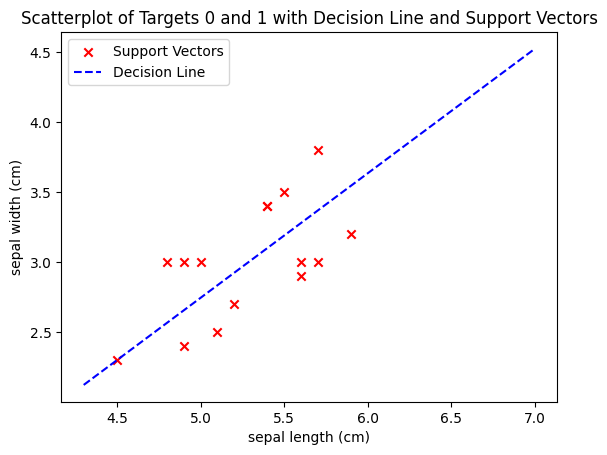

In [8]:
import matplotlib.pyplot as plt

supvectors=SVMmodel.support_vectors_

#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_

# Plot the support vectors
plt.scatter(supvectors[:, 0], supvectors[:, 1], color='red', marker='x', label='Support Vectors')

# Plot decision line
x_values = np.linspace(X_filtered[:, 0].min(), X_filtered[:, 0].max(), 100)
y_values = -(W[0, 0] / W[0, 1]) * x_values - (b / W[0, 1])
plt.plot(x_values, y_values, color='blue', linestyle='--', label='Decision Line')

# Add labels and legend
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatterplot of Targets 0 and 1 with Decision Line and Support Vectors")
plt.legend()

# Show plot
plt.show()



# **Anomaly detection via SVM**

**Import one-class SVM and generate data (Gaussian blobs in 2D-plane):**

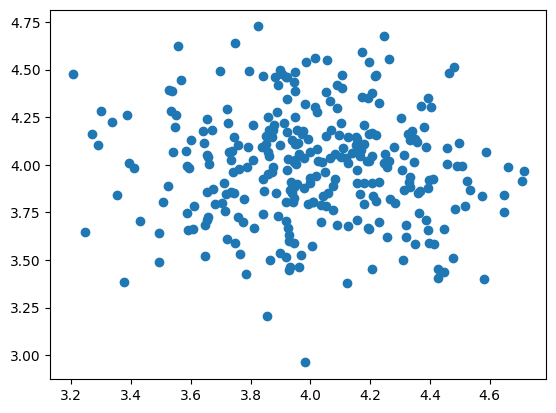

In [9]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



**Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)**

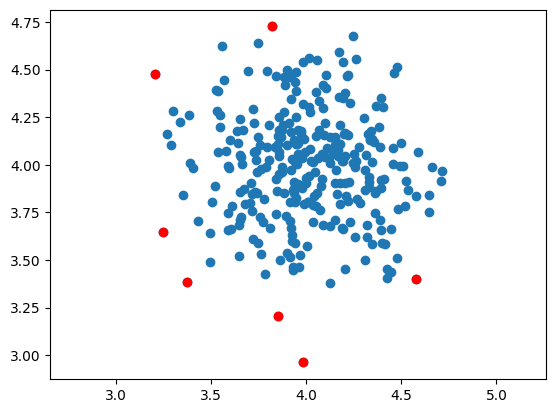

In [17]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



**Plot the support vectors:**

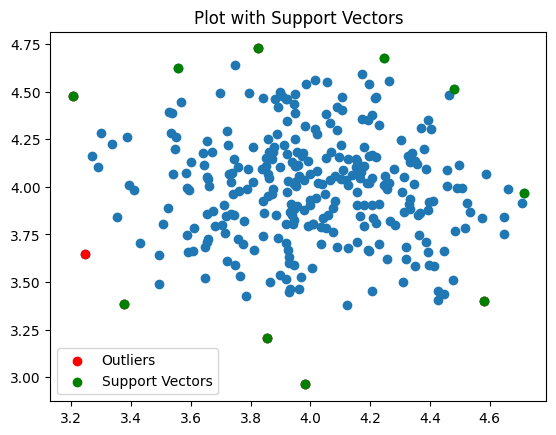

In [18]:
# Plot support vectors
support_vectors = SVMmodelOne.support_vectors_
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red', label='Outliers')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='green', label='Support Vectors')
plt.title("Plot with Support Vectors")
plt.legend()
plt.show()

**What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.**

8.989098620408397


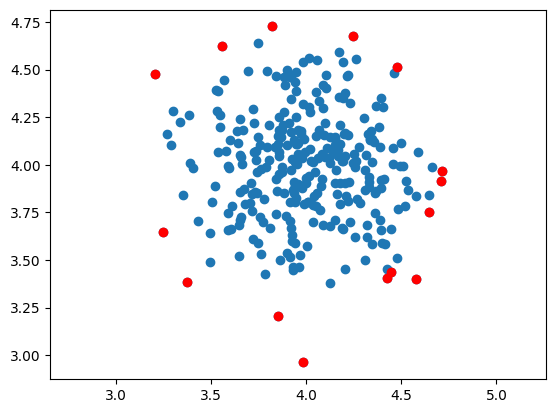

In [19]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()